In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['data.csv']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("../input/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Drop those columns with are empty and are of no use.

In [7]:
df.drop(['id','Unnamed: 32','diagnosis'],1,inplace=True)


**Split the data into train and test**

In [43]:
X=np.array(df.drop(['perimeter_mean'],1))
y=np.array(df['perimeter_mean'])

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

**Using pairplot to visualise relashionship between multiple columns**

<Figure size 432x288 with 0 Axes>

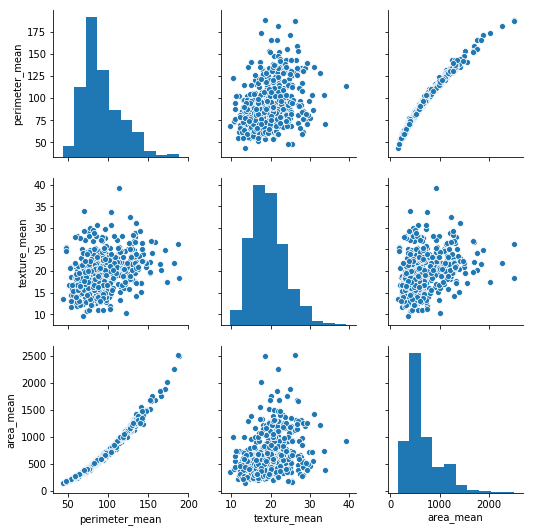

(None,)

In [11]:
import seaborn as sns
plt.figure()
sns.pairplot(df[["perimeter_mean","texture_mean","area_mean"]])
plt.show(),

***Calculating r-mean squared error for test set***

In [13]:
from math import sqrt
rmse=[]
k_list=list(range(30))
for k in k_list:
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    test_error = sqrt(mean_squared_error(y_test,pred))
    rmse.append(test_error) 
    print('TRAIN_RMSE value for k= ' , k , 'is:', test_error)

TRAIN_RMSE value for k=  1 is: 3.589486923540607
TRAIN_RMSE value for k=  2 is: 4.353144776416753
TRAIN_RMSE value for k=  3 is: 4.427262562935431
TRAIN_RMSE value for k=  4 is: 4.566709901831446
TRAIN_RMSE value for k=  5 is: 4.4703476767335655
TRAIN_RMSE value for k=  6 is: 4.238146373311266
TRAIN_RMSE value for k=  7 is: 4.376578643800765
TRAIN_RMSE value for k=  8 is: 4.336507844252128
TRAIN_RMSE value for k=  9 is: 4.5801286719218846
TRAIN_RMSE value for k=  10 is: 4.681566374547972
TRAIN_RMSE value for k=  11 is: 4.753085687859574
TRAIN_RMSE value for k=  12 is: 4.739122392490739
TRAIN_RMSE value for k=  13 is: 4.687406834996975
TRAIN_RMSE value for k=  14 is: 4.7920541831813495
TRAIN_RMSE value for k=  15 is: 4.9741044429873575
TRAIN_RMSE value for k=  16 is: 5.15350304265499
TRAIN_RMSE value for k=  17 is: 5.346704535308386
TRAIN_RMSE value for k=  18 is: 5.527160736113085
TRAIN_RMSE value for k=  19 is: 5.665625960368415
TRAIN_RMSE value for k=  20 is: 5.796841619258884
TRAIN_

***Calculating r-mean squared error for train set***

In [14]:
rmse_val1=[]
k_list=list(range(30))
for k in k_list:
    k=k+1
    model=KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)  
    n_pred=model.predict(X_train)
    train_error = sqrt(mean_squared_error(y_train,n_pred))
    rmse_val1.append(train_error) 
    print('TRAIN_RMSE value for k= ' , k , 'is:', train_error)

TRAIN_RMSE value for k=  1 is: 0.0
TRAIN_RMSE value for k=  2 is: 1.6667522884204407
TRAIN_RMSE value for k=  3 is: 2.2459535423399855
TRAIN_RMSE value for k=  4 is: 2.629125523958232
TRAIN_RMSE value for k=  5 is: 2.7958222961336077
TRAIN_RMSE value for k=  6 is: 2.7890102889662853
TRAIN_RMSE value for k=  7 is: 2.963769119223417
TRAIN_RMSE value for k=  8 is: 3.057537625935912
TRAIN_RMSE value for k=  9 is: 3.1948895798421315
TRAIN_RMSE value for k=  10 is: 3.32366058713769
TRAIN_RMSE value for k=  11 is: 3.374005555557409
TRAIN_RMSE value for k=  12 is: 3.4438174351019404
TRAIN_RMSE value for k=  13 is: 3.514781564866143
TRAIN_RMSE value for k=  14 is: 3.6292060912313158
TRAIN_RMSE value for k=  15 is: 3.749981021355285
TRAIN_RMSE value for k=  16 is: 3.8535854566802854
TRAIN_RMSE value for k=  17 is: 3.923911630531503
TRAIN_RMSE value for k=  18 is: 4.013658893060734
TRAIN_RMSE value for k=  19 is: 4.0959859292835485
TRAIN_RMSE value for k=  20 is: 4.155509893865621
TRAIN_RMSE valu

**Plot Test error vs K**

Text(0, 0.5, 'Test error')

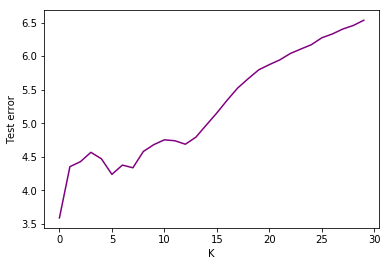

In [15]:
plt.plot(k_list,rmse,color="purple")
plt.xlabel('K')
plt.ylabel('Test error')

**Plot Train error vs K **

Text(0, 0.5, 'Train error')

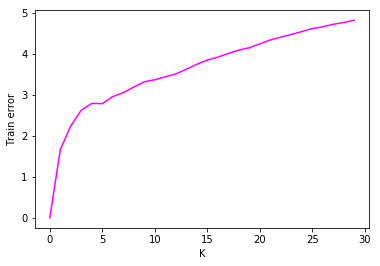

In [16]:
plt.plot(k_list,rmse_val1,color="magenta")
plt.xlabel('K')
plt.ylabel('Train error')

In [17]:
k_list=list(range(30))
newlist=list()
for k in k_list:
    y=k+1
    newlist.append(1/y)
    

**Plot training error and test error vs 1/k**

Text(0, 0.5, 'error')

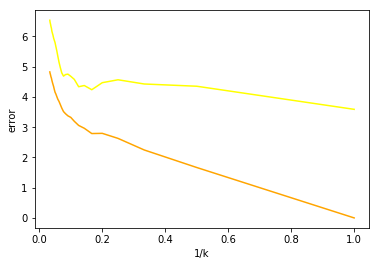

In [18]:
plt.plot(newlist,rmse,color="yellow")
plt.plot(newlist,rmse_val1,color="orange")
plt.xlabel('1/k')
plt.ylabel('error')

***Implementing own created knn function***

In [45]:
def train1(X_train,y_train):
    return

In [60]:
def predict(X_train,y_train,X_test,k):
    distances=[]
    targets=[]
    
    for i in range(len(X_train)):
        distance=np.sqrt(np.sum(np.square(X_test-X_train)))
        distances.append([distance,y_train])
    distances=sorted(distances)
    
    x=0
    for i in range(k):
        x=x+distances[i][1]
        m=x/k
    return(m)    

In [61]:
def kNearestNeighbor(X_train,y_train,X_test,prediction,k):
    if k>len(X_train):
        raise ValueError
    train1(X_train,y_train)
    
    for i in range(len(X_test)):
        print("k: ",k)
        print(X_test[i, :])
        print("prediction:",predict(X_train,y_train,X_test[i, :],k))


In [64]:
predictions=[]
try:
    kNearestNeighbor(X_train,y_train,X_test,predictions,5)

except ValueError:
    print("ERROR!")

k:  5
[1.427e+01 2.255e+01 6.298e+02 1.038e-01 1.154e-01 1.463e-01 6.139e-02
 1.926e-01 5.982e-02 2.027e-01 1.851e+00 1.895e+00 1.854e+01 6.113e-03
 2.583e-02 4.645e-02 1.276e-02 1.451e-02 3.756e-03 1.529e+01 3.427e+01
 1.043e+02 7.283e+02 1.380e-01 2.733e-01 4.234e-01 1.362e-01 2.698e-01
 8.351e-02]
prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   

k:  5
[1.720e+01 2.452e+01 9.294e+02 1.071e-01 1.830e-01 1.692e-01 7.944e-02
 1.927e-01 6.487e-02 5.907e-01 1.041e+00 3.705e+00 6.947e+01 5.820e-03
 5.616e-02 4.252e-02 1.127e-02 1.527e-02 6.299e-03 2.332e+01 3.382e+01
 1.516e+02 1.681e+03 1.585e-01 7.394e-01 6.566e-01 1.899e-01 3.313e-01
 1.339e-01]
prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6

prediction: [ 80.98  84.74  83.51  64.41  81.37  59.01  76.85 108.3  108.8  103.7
 131.1   67.49  59.6   81.09 102.9  121.4   71.25 114.2   95.77  79.83
  87.32  54.34  82.15  77.88 113.4  104.1   74.2   65.67  88.99 120.9
 102.4   81.47  59.75 121.3   78.29 134.7   89.59  97.65  91.56  70.67
 165.5  113.4  109.7   94.25  64.6  127.9   69.5   70.95 152.1   96.12
  71.38 130.    81.35  75.21 147.3  114.6   80.88  94.48  55.84  61.49
  48.34 132.9  114.5   68.64  79.01  65.12 107.5   73.16 135.9   74.24
  71.9   94.66 120.2   97.84  65.05 128.    75.    71.94  80.62 144.4
  84.06 124.8   88.52  96.22 114.4   77.25  75.17 102.7  155.1   56.74
  59.26  85.26  63.76  91.22  95.81  72.17  63.   106.2   90.96 186.9
 119.6  138.9   82.85  78.78  66.2   78.29 137.8   61.64  61.68  77.23
 108.4   92.25  72.76  58.79  96.71  77.83  54.66  91.12  82.01  88.64
 129.9   96.42 132.4   94.49  88.68  87.88 132.4   73.59  71.24  97.26
  71.79 109.8   73.73 110.    96.39 134.7  122.9   92.51 101.2   78.6